## Imports and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set font size of plot elements\n",
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def photons_from_temp(ω_c, temp):
    hbar_ov_k = 7.639e-12
    return (np.exp(hbar_ov_k * ω_c / temp) - 1) ** -1

In [4]:
def temp_from_photons(ω_c, num_photons):
    hbar_ov_k = 7.639e-12 
    return hbar_ov_k * ω_c / np.log(1 / num_photons + 1)

## Cooling Power

From what I could tell, the cooling power of different cyrogenic technologies is how much heat power is removed at a given temperature.  As an example, for dilution refrigerators with liquid Helium, this is given by the difference in enthalpy of mixing phases of He at a specific temperature.  According to Kurt, the rate of photons coming into the cavity from the thermal bath is just the output coupling rate $\kappa$ multiplied by the mean number of photons in the thermal bath $n_T$.  (Question - Matt and Ethan mentioned that $\kappa$ can often be set to 0.  Doesn't that mean that we would get worse cooling power?)

In [5]:
# First calculate the number of photons in the thermal bath at say 77 K
T = 5
ωc = 2.87 * 2 * np.pi * 1e9
nT = photons_from_temp(ωc, T)

In [6]:
# Now calculate the power associated with these photons
# This is just the energy times the rate - κ
Q = 2.5e4
γ = ωc / Q
energy = 6.626e-34 * ωc / (2 * np.pi)
pow = energy * γ
print("Energy: ", energy, " J")
print("Cooling power: ", pow, " W")

Energy:  1.9016620000000002e-24  J
Cooling power:  1.3716871958789768e-18  W


### Power consumption
According to Hanfeng, the optical excitation rate $\gamma_{opt}$ is given by
$\gamma_{opt} = P / \hbar\omega / A * \sigma_A$,
where $P$ is the power, $A$ is the area of the laser light, and $\sigma_A$ is the cross-section of the NV center.  Then the polarization is given by
$p = 0.29\gamma_{opt} / (3\gamma_{th} + 0.38\gamma_{opt})$
where $\gamma_{th} \sim 90 s^{-1}$ is the thermalization rate.  So, we can calculate the power required to achieve a desired steady-state polarization.

In [7]:
# Seems that this is unnecessary given what Hanfeng said, but I'll keep it here in case it ends up being useful later.
ρ = 800 # ppb
Vd = 0.3 * 0.3 * 0.05 # cm^3
N = 800 * 1e-9 * 3.53 * Vd / 12.01 * 6.022e23
print("Number of NVs: %3e" % N)

Number of NVs: 6.371988e+14


In [8]:
# First define the desired polarization.  For now we'll use the ideal case 1
p = 0.7
γ_th = 90
γ_opt = 3 * γ_th * p / (0.29 - 0.38 * p)
print("γ_opt: ", γ_opt)

γ_opt:  7874.999999999993


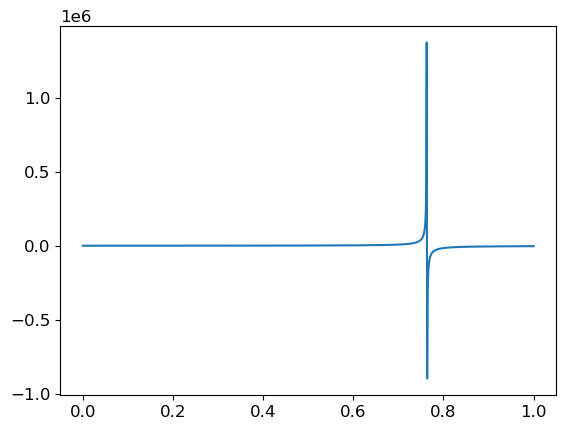

In [10]:
temp_p = np.linspace(0, 1, 1000)
temp_γ_opt = 3 * γ_th * temp_p / (0.29 - 0.38 * temp_p)
plt.plot(temp_p, temp_γ_opt)

In [11]:
# The cross-section is 
σ_a = 3e-17 #cm^2

In [15]:
# for a 532 nm laser, the energy per photon is
h = 6.626e-34
c = 3e8
λ = 532e-9
Ep = h * c / λ # J

In [16]:
# If we assume that the diamond is oriented so that the thin edge is along the direction of propagation of the laser, the area the laser
# should cover is 0.3 * 0.3 cm^2
A = 0.3 * 0.3  # cm^2

In [20]:
# So the power is
P = γ_opt * Ep * A / σ_a
print("P = %3e W" % P)

P = 8.827401e+00 W
